In [14]:
import tensorflow
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import json

import numpy as np

# 1 Data

## Get the data

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-12-15 07:55:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-12-15 07:55:38 (100 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



## Preprocess

In [4]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
with open("/tmp/sarcasm.json", "r") as jsonfile:
  datastore = json.load(jsonfile)

In [9]:
sentences = []
labels = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

### view labels and sentences

In [10]:
sentences[:4]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas']

In [11]:
labels[:4]

[0, 0, 1, 1]

## Tokenizer and Pad Sequence

In [12]:
# split
train_sentences = sentences[:training_size]
train_labels = labels[:training_size]

test_sentences = sentences[training_size:]
test_labels = labels[training_size:]

In [15]:
tokenizer = Tokenizer( num_words=vocab_size,  oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating = trunc_type)

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(train_padded)
training_labels = np.array(train_labels)

testing_padded = np.array(test_padded)
testing_labels = np.array(test_labels)

### view preprocessed sentences and labels

In [16]:
training_padded[:1]

array([[328,   1, 799,   1,   1,  47, 389,   1,   1,   6,   1,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [17]:
training_labels[:1]

array([0])

# 2 Model

In [18]:
model = keras.models.Sequential([ 
  keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
  keras.layers.Bidirectional(keras.layers.LSTM(32)),
  keras.layers.Dense(24, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])

In [19]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(
    training_padded,
    training_labels,
    epochs = 50,
    validation_data = (testing_padded, testing_labels),
    verbose = 2
)

Epoch 1/50
625/625 - 8s - loss: 0.4547 - accuracy: 0.7664 - val_loss: 0.3990 - val_accuracy: 0.8140
Epoch 2/50
625/625 - 7s - loss: 0.3594 - accuracy: 0.8321 - val_loss: 0.3825 - val_accuracy: 0.8231
Epoch 3/50
625/625 - 8s - loss: 0.3420 - accuracy: 0.8449 - val_loss: 0.3737 - val_accuracy: 0.8253
Epoch 4/50
625/625 - 7s - loss: 0.3199 - accuracy: 0.8573 - val_loss: 0.3686 - val_accuracy: 0.8326
Epoch 5/50
625/625 - 7s - loss: 0.3041 - accuracy: 0.8643 - val_loss: 0.3780 - val_accuracy: 0.8311
Epoch 6/50
625/625 - 7s - loss: 0.2920 - accuracy: 0.8712 - val_loss: 0.3821 - val_accuracy: 0.8368
Epoch 7/50
625/625 - 7s - loss: 0.2809 - accuracy: 0.8777 - val_loss: 0.3812 - val_accuracy: 0.8313
Epoch 8/50
625/625 - 7s - loss: 0.2743 - accuracy: 0.8802 - val_loss: 0.4008 - val_accuracy: 0.8281
Epoch 9/50
625/625 - 7s - loss: 0.2661 - accuracy: 0.8832 - val_loss: 0.3977 - val_accuracy: 0.8283
Epoch 10/50
625/625 - 8s - loss: 0.2593 - accuracy: 0.8885 - val_loss: 0.3943 - val_accuracy: 0.8284

# 3 Plot Accuracy and Loss

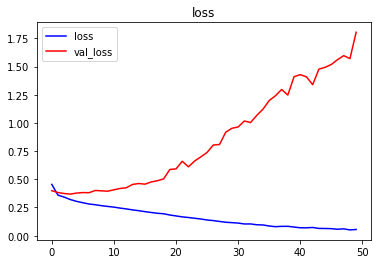

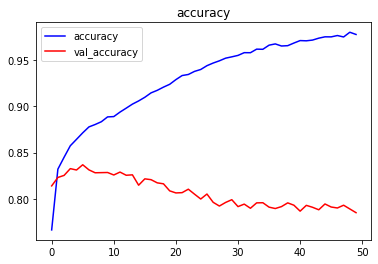

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  train = history.history[string]
  val = history.history["val_" + string]

  plt.plot(train, color = "b", label = string)
  plt.plot(val, color = "r", label = "val_"+ string)
  plt.title(string)
  plt.legend([string, "val_"+ string])
  plt.show()

plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

In [ ]:
model.save("test.h5")

# 4 Testing

## own sentence

In [31]:
own_sen = "yeah, it's great"

own_seq = tokenizer.texts_to_sequences([own_sen])
own_padded = pad_sequences(own_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
model.predict(own_padded)

array([[0.28382567]], dtype=float32)

## from test data

In [33]:
model.predict(testing_padded[1].reshape(1,120))

array([[2.853175e-13]], dtype=float32)

In [34]:
testing_labels[1]

0